In [1]:
import pandas as pd

from pathlib import Path

import os, sys
sys.path.append(os.path.abspath('..'))

from python_scripts.activity_analysis import compute_all_events
from python_scripts.metric_computation import compute_segment_metrics


## Load Data

In [2]:
df = pd.read_csv("../data/capture_clean.csv", parse_dates=["t"])
df.head()

,id,cid,counter,t_BigToe,t_1st-metatarsal,t_3rd-metatarsal,t_5th-metatarsal(side),p_BigToe,p_1st-metatarsal,p_3rd-metatarsal,...,dt,patient_id,segment_id,p_BigToe_f,p_1st-metatarsal_f,p_3rd-metatarsal_f,p_5th-metatarsal(side)_f,total_load,temp_mean,is_worn
0,568,0,1693939685000,28,29,30,28,0.051546,0.027539,0.0,...,NaN,0,0,23.015762,11.395161,0.0,0.0,0.079085,28.75,True
1,569,0,1693939685373,28,29,30,28,0.051546,0.027539,0.0,...,0.373,0,0,26.139223,13.511290,0.0,0.0,0.079085,28.75,True
2,634,0,1693939783245,30,30,31,30,0.051546,0.027539,0.0,...,97.872,0,1,28.976165,15.443604,0.0,0.0,0.079085,30.25,True
3,635,0,1693939783638,30,30,31,30,0.051546,0.027539,0.0,...,0.393,0,1,31.526590,17.192102,0.0,0.0,0.079085,30.25,True
4,830,0,1693940490987,29,30,31,27,0.051546,0.027539,0.0,...,707.349,0,2,33.790497,18.756785,0.0,0.0,0.079085,29.25,True


## Computing metrics for events
* This comes after step events detection.
* Calculate metrics for each event which includes start time and end time, contact duration, pressure loads and temperatures.

In [3]:
P_SENSORS = [
    "p_BigToe_f",
    "p_1st-metatarsal_f",
    "p_3rd-metatarsal_f",
    "p_5th-metatarsal(side)_f"
]

T_SENSORS = [
    "t_BigToe",
    "t_1st-metatarsal",
    "t_3rd-metatarsal",
    "t_5th-metatarsal(side)"
]

events_df = compute_all_events(
    df,
    sensors=P_SENSORS,
    temp_cols=T_SENSORS,
)


In [4]:
out = Path('../data/metrics')
out.mkdir(parents=True, exist_ok=True)
events_df.to_csv(out / 'events.csv', index=False)
events_df.head()

,patient_id,segment_id,event_id,start_time,end_time,contact_time_sec,mean_load,peak_load,load_var,pti,temp_mean,temp_max,temp_min,temp_std
0,43,0,7,2023-11-08 18:05:29.173,2023-11-08 18:05:30.544,1.371,247.611361,268.743655,257.999643,241.621907,29.5,31,27,1.549193
1,43,0,8,2023-11-08 18:05:30.544,2023-11-08 18:05:31.579,1.035,227.268783,249.542522,296.760769,155.199847,29.5,31,27,1.566699
2,43,0,9,2023-11-08 18:05:31.579,2023-11-08 18:05:33.018,1.439,217.880751,233.694408,205.641649,230.137212,29.5,31,27,1.549193
3,47,0,4,2023-11-08 18:19:34.384,2023-11-08 18:19:35.778,1.394,165.283193,181.572656,149.077954,163.684789,28.0,29,26,1.154701
4,47,0,5,2023-11-08 18:19:35.778,2023-11-08 18:19:37.171,1.393,151.767469,169.318637,146.776276,156.543122,28.0,29,26,1.264911


## Visualisations

In [5]:
import matplotlib.pyplot as plt

pid = 296
ev = events_df[events_df["patient_id"] == pid].copy()

print(f"Number of events for patient {pid}: {len(ev)}")
ev.head()


Number of events for patient 296: 7


,patient_id,segment_id,event_id,start_time,end_time,contact_time_sec,mean_load,peak_load,load_var,pti,temp_mean,temp_max,temp_min,temp_std
24,296,0,3,2024-02-22 18:37:00.340,2024-02-22 18:37:01.823,1.483,183.036632,196.586207,138.469398,193.680477,29.5,30,29,0.516398
25,296,0,4,2024-02-22 18:37:01.823,2024-02-22 18:37:02.813,0.990,183.184009,195.148650,101.211189,112.652577,29.5,30,29,0.522233
26,296,0,5,2024-02-22 18:37:02.813,2024-02-22 18:37:03.868,1.055,190.712104,205.996461,156.336802,131.268838,29.5,30,29,0.522233
27,296,0,6,2024-02-22 18:37:03.868,2024-02-22 18:37:05.289,1.421,186.338381,198.870664,136.690512,188.490670,29.5,30,29,0.516398
28,296,0,7,2024-02-22 18:37:05.289,2024-02-22 18:37:06.370,1.081,178.108639,195.436748,150.539917,121.597411,29.5,30,29,0.522233


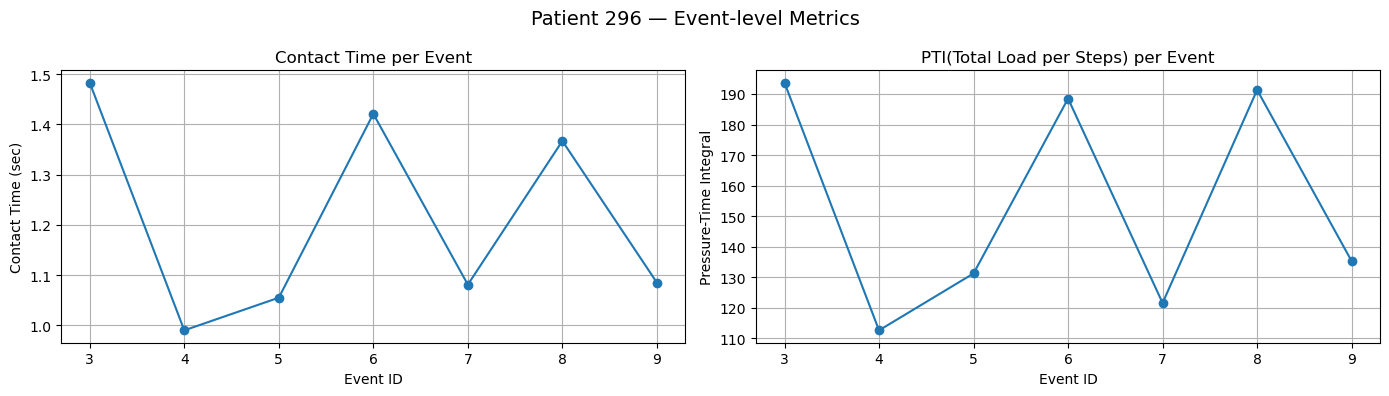

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(14, 4), sharex=True)

# Contact time
axes[0].plot(ev["event_id"], ev["contact_time_sec"], marker="o")
axes[0].set_title("Contact Time per Event")
axes[0].set_xlabel("Event ID")
axes[0].set_ylabel("Contact Time (sec)")
axes[0].grid(True)

# PTI
axes[1].plot(ev["event_id"], ev["pti"], marker="o")
axes[1].set_title("PTI(Total Load per Steps) per Event")
axes[1].set_xlabel("Event ID")
axes[1].set_ylabel("Pressure-Time Integral")
axes[1].grid(True)

plt.suptitle(f"Patient {pid} — Event-level Metrics", fontsize=14)
plt.tight_layout()


Path("../figures").mkdir(exist_ok=True)
out_path = f"../figures/id_{pid}_contact&totalload_metrics.png"
plt.savefig(out_path, dpi=300, bbox_inches="tight")


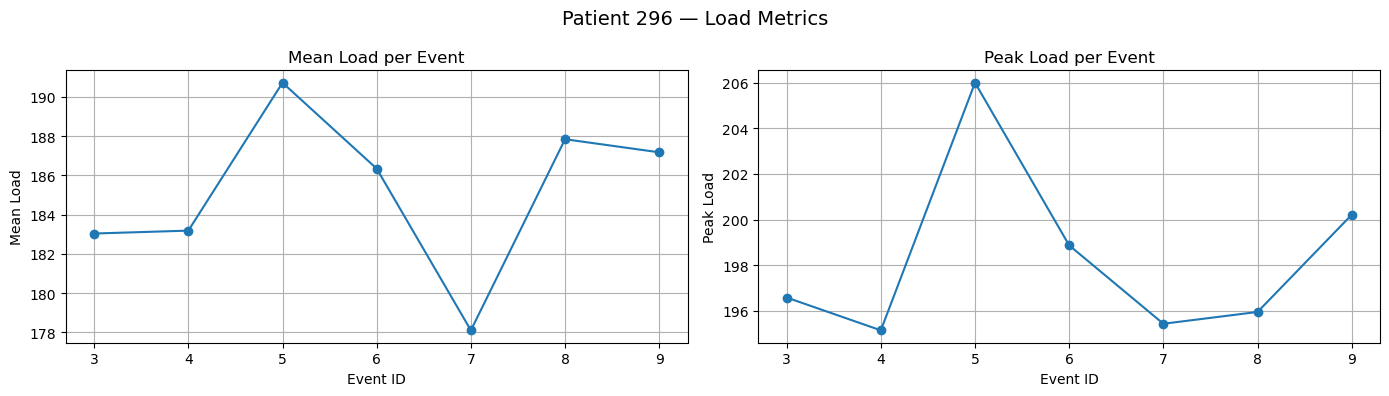

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(14, 4), sharex=True)

# Mean load
axes[0].plot(ev["event_id"], ev["mean_load"], marker="o")
axes[0].set_title("Mean Load per Event")
axes[0].set_xlabel("Event ID")
axes[0].set_ylabel("Mean Load")
axes[0].grid(True)

# Peak load
axes[1].plot(ev["event_id"], ev["peak_load"], marker="o")
axes[1].set_title("Peak Load per Event")
axes[1].set_xlabel("Event ID")
axes[1].set_ylabel("Peak Load")
axes[1].grid(True)

plt.suptitle(f"Patient {pid} — Load Metrics", fontsize=14)
plt.tight_layout()


out_path = f"../figures/id_{pid}_load_metrics.png"
plt.savefig(out_path, dpi=300, bbox_inches="tight")


## Computing metrics from each segments
* These metrics include cadence, rhythm, stance and pressure during a segment.

In [8]:
segment_df = compute_segment_metrics(events_df)

segment_df.to_csv(out / 'metrics.csv', index=False)
segment_df.head()

,patient_id,segment_id,steps,dur_sec,cadence_spm,mean_contact,contact_var,step_interval_mean,step_interval_cv,mean_pti,mean_load,peak_load,temp_mean,temp_max,temp_min
0,43,0,3,3.845,46.814044,1.281667,0.216308,1.2030,0.197496,208.986322,230.920299,268.743655,29.500000,31,27
1,47,0,3,4.272,42.134831,1.424000,0.052830,1.3935,0.000507,159.814707,155.889035,181.572656,28.104167,29,26
2,49,1,2,2.473,48.524060,1.236500,0.228396,1.3980,NaN,115.927672,136.166254,150.514309,28.250000,29,27
3,62,0,1,1.456,41.208791,1.456000,NaN,NaN,NaN,84.154577,77.010567,77.059864,8.000000,9,5
4,73,0,1,1.425,42.105263,1.425000,NaN,NaN,NaN,68.853688,63.304758,63.569926,18.250000,31,-18
